# Regressão Linear

In [1]:
# Caminho alternativo dataset Boston House Price

import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
    'PTRATIO', 'B', 'LSTAT', 'MEDV'
]

data = pd.read_csv(url, header=None, delimiter=r"\s+", names=column_names)
data.to_csv('boston_housing.csv', index=False)

In [2]:
boston = data

In [3]:
df = pd.DataFrame(boston, columns=column_names)

In [4]:
# Removido coluna que eu quero prever

data = df.drop('MEDV', axis=1)

In [5]:
# Prever a variável dependente de preço

target = boston['MEDV']
print(target)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64


In [6]:
# Modelo de regressão linear

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [7]:
# Treina o modelo

lr.fit(X=data, y=target)

LinearRegression()

In [8]:
# Score de acerto do modelo em porcentagem

X = data
y = target
# lr.score(X, y)
print("%.2f" % (lr.score(X, y) * 100) + '%')


74.06%


In [9]:
# Previsão das 3 primeiras linhas

print(lr.predict(data.iloc[0:3]))

[30.00384338 25.02556238 30.56759672]


In [10]:
# Valor real das 3 primeiras linhas

print(df[0:3])

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  


# KNN ou K Nearest Neighbors : K vizinhos mais próximos
### A proximidade é com base em campos parecidos, não proximidade

In [11]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()

In [12]:
# 5 vizinhos próximos

regressor.n_neighbors=5
regressor.fit(X, y).score(X, y)

0.716098217736928

In [13]:
regressor.n_neighbors=3
regressor.fit(X, y).score(X, y)

0.7868514704495158

In [14]:
regressor.n_neighbors=2
regressor.fit(X, y).score(X, y)

0.8562711854960806

In [15]:
regressor.predict(X = data.iloc[0:3])

array([22.05, 19.1 , 30.65])

In [16]:
print(df['MEDV'][0:3])

0    24.0
1    21.6
2    34.7
Name: MEDV, dtype: float64


# KNN com dados de teste separados

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [19]:
regressor.n_neighbors = 3
regressor.fit(X_train, y_train).score(X_test, y_test)

0.7046442656646525

In [20]:
regressor.predict(X = data.iloc[0:3])

array([22.06666667, 19.2       , 22.73333333])

In [21]:
print(df['MEDV'][0:3])

0    24.0
1    21.6
2    34.7
Name: MEDV, dtype: float64


## Prever Resultados

In [22]:
y_pred = lr.predict(X_test)

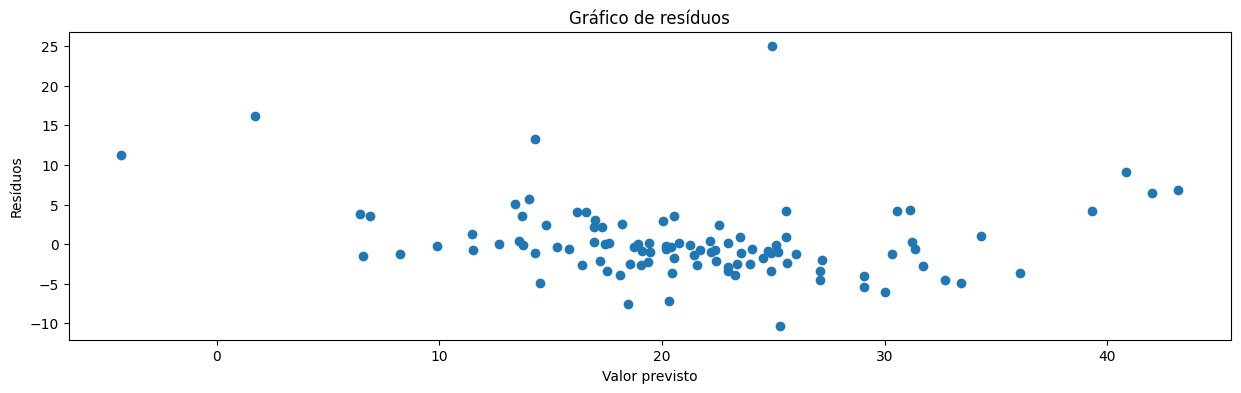

In [23]:
# Gráfico de resíduos (diferença entre a predição e o valor verdadeiro esperado)

import matplotlib.pyplot as plt
plt.figure(figsize = (15,4))
plt.scatter(y_pred, y_test - y_pred)
plt.title("Gráfico de resíduos")
plt.xlabel("Valor previsto")
plt.ylabel("Resíduos")
plt.show()

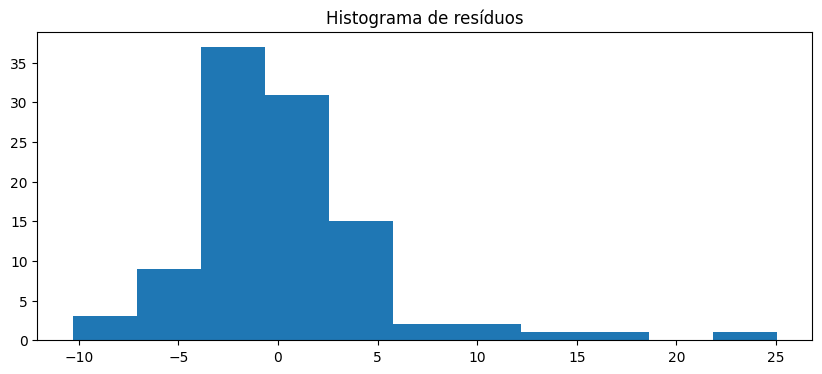

In [24]:
plt.figure(figsize = (10,4))
plt.hist(y_test-y_pred, bins = 11)
plt.title("Histograma de resíduos")
plt.show()

#### Gráfico QQ

Progressões mais elevadas não estão sendo capturadas pelo modelo de regressão linear. <br>
Está errando mais quando ele prevê uma evolução alta do diabetes

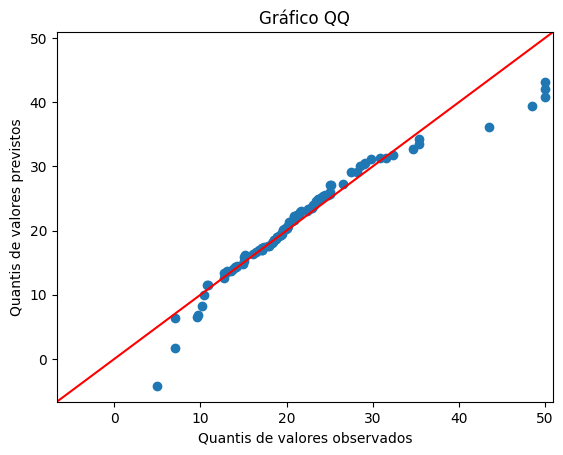

In [25]:
from statsmodels.graphics.gofplots import qqplot_2samples

qqplot_2samples(y_test, y_pred, line = '45')
plt.title("Gráfico QQ")
plt.xlabel("Quantis de valores observados")
plt.ylabel("Quantis de valores previstos")
plt.show()